# Chatty the chatterbox

## Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np
import time

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Define Parameters

In [18]:
data_path = "..//data//chats.txt"

output_path = "..//results//"
output_file_name = "bots_chats"

files = ["..//data//chats.txt"]
save_file_path = output_path + output_file_name

PADDING = 'pre'
TRUNC = 'pre'
MAXLEN = 7

VOCAB_SIZE = 10000
EMB_DIM = 64

OPTIMIZER = 'adam'
LOSS = 'categorical_crossentropy'
METRICS = ['acc']
EPOCHS = 100
BATCH_SIZE = 128
VAL_SPLIT = 0.1

SEEDER = 'Hi'    ## Seeder word to start prediction of poetry

model_name = "chats_telegram_model.h5"

data = "This is some random statement \n being used as placeholder for the actual data that is to be \n imported later from a file."

## Load Data

In [19]:
corpus = ''
for file in files:
    with open(file, encoding='utf-8') as f:
        data = f.read()
        corpus += data + '\n'
        f.close()
#data = data.replace('\n', ' \n<>')
sentences = corpus[:10000].lower().split('\n')
print(len(sentences))
print(sentences[0])
print(len(sentences[0]))

314
i send you thst moaning audio
29


## Tokenize Data

In [20]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
total_words = len(word_index) + 1
VOCAB_SIZE = total_words
print(total_words)
print(word_index['a'])

811
14


In [21]:
## create reverse_word_index
reverse_word_index = {}
for word, i in word_index.items():
    reverse_word_index[i] = word
print(reverse_word_index[1])

u


## Change Sentences to Sequences

In [22]:
sequences = tokenizer.texts_to_sequences(sentences)
padded_seq = pad_sequences(sequences, padding=PADDING, truncating=TRUNC, maxlen=MAXLEN)
print(padded_seq[0])

[  0   2 160  11 283 284 285]


## Extract trainX and trainY from sequences

In [23]:
trainX = padded_seq[:-1,:]
trainY = padded_seq[1:,:]

INP_LEN = trainX.shape[1]
OUT_LEN = trainY.shape[1]
trainY = tf.keras.utils.to_categorical(trainY, num_classes=VOCAB_SIZE)

print(INP_LEN)
print(OUT_LEN)
print(trainX.shape)
print(trainY.shape)

7
7
(313, 7)
(313, 7, 811)


In [24]:
print(trainX[31])
print(trainY[0])

[  0   0   0   0   0 168 310]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Define Callback

In [25]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, log={}):
        if (log.get('acc')>0.90):
            self.model.stop_training = True
            print("\n Stopped training since model reached accuracy of 90%")
callback = myCallback()

## Define Model

In [26]:
LOAD_MODEL = False

if LOAD_MODEL == True:
    try:
        model = tf.keras.models.load_model(model_name)
        print("\nModel loaded successfully")
    except:
        print("\nModel not loaded. Building new...")
        LOAD_MODEL = False
if LOAD_MODEL == False:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(VOCAB_SIZE, EMB_DIM, input_length=INP_LEN),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True)),
        tf.keras.layers.Dense(VOCAB_SIZE, activation='softmax')
    ])
    

In [27]:
model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 7, 64)             51904     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 7, 64)             24832     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 7, 32)             10368     
_________________________________________________________________
dense_1 (Dense)              (None, 7, 811)            26763     
Total params: 113,867
Trainable params: 113,867
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [28]:
history = model.fit(trainX, trainY, validation_split=VAL_SPLIT, verbose=1, epochs = EPOCHS, shuffle=False, batch_size=BATCH_SIZE, callbacks=[callback])

Epoch 1/100
3/3 [==============================] - 2s 509ms/step - loss: 6.6960 - acc: 0.1149 - val_loss: 6.6912 - val_acc: 0.4375
Epoch 2/100
3/3 [==============================] - 0s 45ms/step - loss: 6.6872 - acc: 0.4814 - val_loss: 6.6836 - val_acc: 0.4375
Epoch 3/100
3/3 [==============================] - 0s 43ms/step - loss: 6.6764 - acc: 0.4825 - val_loss: 6.6737 - val_acc: 0.4375
Epoch 4/100
3/3 [==============================] - 0s 40ms/step - loss: 6.6622 - acc: 0.4825 - val_loss: 6.6604 - val_acc: 0.4375
Epoch 5/100
3/3 [==============================] - 0s 38ms/step - loss: 6.6425 - acc: 0.4825 - val_loss: 6.6419 - val_acc: 0.4375
Epoch 6/100
3/3 [==============================] - 0s 38ms/step - loss: 6.6144 - acc: 0.4825 - val_loss: 6.6156 - val_acc: 0.4375
Epoch 7/100
3/3 [==============================] - 0s 40ms/step - loss: 6.5733 - acc: 0.4825 - val_loss: 6.5775 - val_acc: 0.4375
Epoch 8/100
3/3 [==============================] - 0s 38ms/step - loss: 6.5129 - acc: 0.4

3/3 [==============================] - 0s 39ms/step - loss: 3.4722 - acc: 0.4825 - val_loss: 4.7186 - val_acc: 0.4375
Epoch 64/100
3/3 [==============================] - 0s 35ms/step - loss: 3.4629 - acc: 0.4825 - val_loss: 4.7281 - val_acc: 0.4375
Epoch 65/100
3/3 [==============================] - 0s 38ms/step - loss: 3.4533 - acc: 0.4825 - val_loss: 4.7387 - val_acc: 0.4375
Epoch 66/100
3/3 [==============================] - 0s 39ms/step - loss: 3.4437 - acc: 0.4825 - val_loss: 4.7496 - val_acc: 0.4375
Epoch 67/100
3/3 [==============================] - 0s 40ms/step - loss: 3.4345 - acc: 0.4825 - val_loss: 4.7604 - val_acc: 0.4375
Epoch 68/100
3/3 [==============================] - 0s 34ms/step - loss: 3.4253 - acc: 0.4825 - val_loss: 4.7711 - val_acc: 0.4375
Epoch 69/100
3/3 [==============================] - 0s 34ms/step - loss: 3.4161 - acc: 0.4825 - val_loss: 4.7820 - val_acc: 0.4375
Epoch 70/100
3/3 [==============================] - 0s 37ms/step - loss: 3.4071 - acc: 0.4825 - 

## Save Model

In [29]:
model.save(model_name)

## Plot Results

C:\Users\XARC\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
C:\Users\XARC\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
C:\Users\XARC\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
C:\Users\XARC\AppDa

<Figure size 432x288 with 0 Axes>

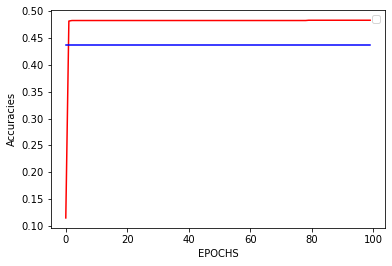

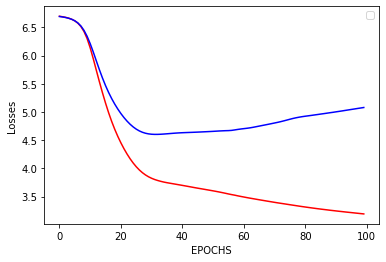

<Figure size 432x288 with 0 Axes>

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(EPOCHS)

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracies')
plt.legend('Train Acc', 'Val Acc')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('EPOCHS')
plt.ylabel('Losses')
plt.legend('Train Loss', 'Val Loss')
plt.figure()

## Generate Chats by iterating over the predictor from the model and input from user

In [31]:
reverse_word_index[0] = '!'

In [32]:
sentence = SEEDER.lower()
corpus = SEEDER.lower()
new_line = False
print (sentence, end='\n')

sentence = input()
while(sentence != 'stop'):
    corpus += '\nUser: ' + sentence
    seq = tokenizer.texts_to_sequences([sentence])
    seq = pad_sequences(seq, padding=PADDING, truncating=TRUNC, maxlen=INP_LEN)
    pred_seq = model.predict(seq)
    pred_seq = np.argmax(pred_seq, axis=2)
    pred_sent = [reverse_word_index[x] for x in pred_seq[0]]
    pred_sent = ' '.join(pred_sent)
    print(pred_sent)
    corpus += '\nBot: ' + pred_sent
    sentence = input()
print ("Bye, See ya later!!!")


hi
hi
             
again not saying anything!
             
stop
Bye, See ya later!!!


## Save Chats in a file

In [17]:
timestr = time.strftime("_%Y_%m_%d_%H_%M_%S")

save_file_path += timestr + ".txt"
try:
    with open(save_file_path, 'w') as f:
        f.write(corpus)
        f.close()
except:
    print("\nWrite was Unsuccessful")